In [1]:
# Install the required libraries (from pip_requirements.txt)
%pip install -r pip_requirements.txt

!python -m spacy download en_core_web_sm

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached bertopic-0.16.4-py3-none-any.whl.metadata (23 kB)
  Using cached sentence_transformers-3.3.1-py3-none-any.whl.metadata (10 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached matplotlib_venn-1.1.1-py3-none-any.whl
  Using cached spacy-3.8.2-cp311-cp311-win_amd64.whl.metadata (27 kB)
  Using cached transformers-4.46.3-py3-none-any.whl.metadata (44 kB)
  Using cached torch-2.5.1-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached pyproj-3.7.0-cp311-cp311-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata (7.2 kB)
  Using cached hdbscan-0.8.40-cp311-cp311-win_amd64.wh

# Initial analysis

In [1]:
# Modules to import
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from importlib import reload

In [2]:
paths = ['src/data','src/models','src/scripts','src/utils']
for path in paths:
    sys.path.append(path)

### IV.3 Theme Study for Cultural Influence Analysis

### nouvelle méthode pour le score d'influence

In [3]:
from scriptculture import process_data_us_influence          # Import the function that processes the data for this study

df_us_influence = process_data_us_influence()
df_us_influence.head()

,Country,US_Term_Count,Number of movies,Influence_score,log_number_of_movies,World_region
0,France,531,2297,0.231171,7.739359,Europe
1,Soviet Union,30,255,0.117647,5.541264,Eastern Europe and Central Asia
2,Russia,18,217,0.082949,5.379897,Eastern Europe and Central Asia
3,United States of America,7657,20789,0.368320,9.942179,North America
4,India,262,4752,0.055135,8.466321,South Asia


In [4]:
from scriptculture import process_data_us_influence_nlp        # Import the function that processes the data for this study

df_us_influence_nlp = process_data_us_influence_nlp()
df_us_influence_nlp.head()

,Country,Sum_us_score,Number of movies,nlp_score
0,France,244.016415,1859,0.131262
1,Soviet Union,19.349936,243,0.079629
2,Russia,18.917137,191,0.099043
3,India,362.924297,4547,0.079816
4,Czech Republic,8.267098,73,0.113248


In [48]:
df_us_influence_nlp.describe()

,Sum_us_score,Number of movies,nlp_score
count,143.000000,143.000000,143.000000
mean,20.118346,150.671329,0.094180
std,63.399768,499.638740,0.073204
min,0.000115,2.000000,0.000058
25%,0.194499,5.000000,0.031077
50%,1.192415,16.000000,0.088523
75%,9.209642,87.500000,0.139922
max,499.401792,4547.000000,0.366266


In [5]:
df_us_influence_final = pd.merge(df_us_influence, df_us_influence_nlp, on='Country', how='inner')
df_us_influence_final.head()

,Country,US_Term_Count,Number of movies_x,Influence_score,log_number_of_movies,World_region,Sum_us_score,Number of movies_y,nlp_score
0,France,531,2297,0.231171,7.739359,Europe,244.016415,1859,0.131262
1,Soviet Union,30,255,0.117647,5.541264,Eastern Europe and Central Asia,19.349936,243,0.079629
2,Russia,18,217,0.082949,5.379897,Eastern Europe and Central Asia,18.917137,191,0.099043
3,India,262,4752,0.055135,8.466321,South Asia,362.924297,4547,0.079816
4,Australia,160,748,0.213904,6.617403,Oceania,88.208456,560,0.157515


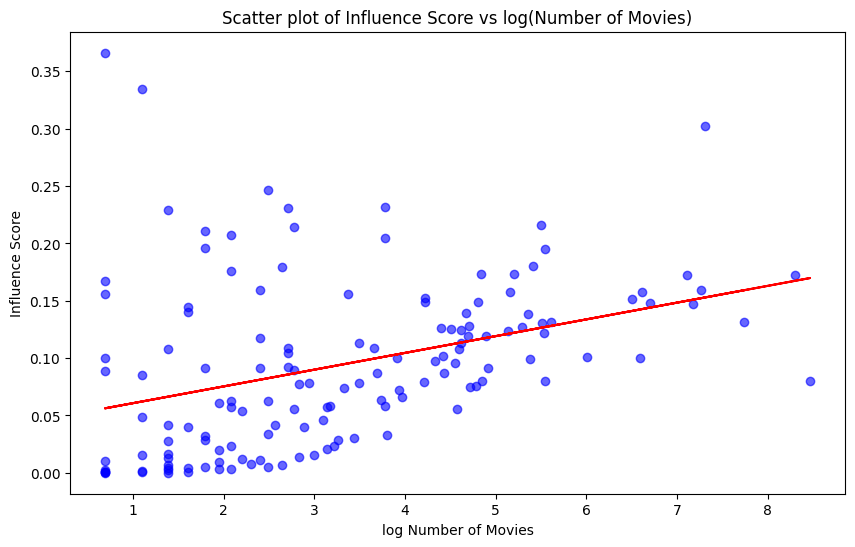

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_us_influence_final['log_number_of_movies'], 
    df_us_influence_final['nlp_score'], 
    color='blue', 
    alpha=0.6
)
#add the linear regression line
z = np.polyfit(df_us_influence_final['log_number_of_movies'], df_us_influence_final['nlp_score'], 1)
p = np.poly1d(z)
plt.plot(df_us_influence_final['log_number_of_movies'],p(df_us_influence_final['log_number_of_movies']),"r-")
plt.title('Scatter plot of Influence Score vs log(Number of Movies)')
plt.xlabel('log Number of Movies')
plt.ylabel('Influence Score')

plt.show()

C:\Users\Oscar\AppData\Local\Temp\ipykernel_32112\2809295553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='World_region', y='nlp_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))
C:\Users\Oscar\AppData\Local\Temp\ipykernel_32112\2809295553.py:6: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='World_region', y='nlp_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))


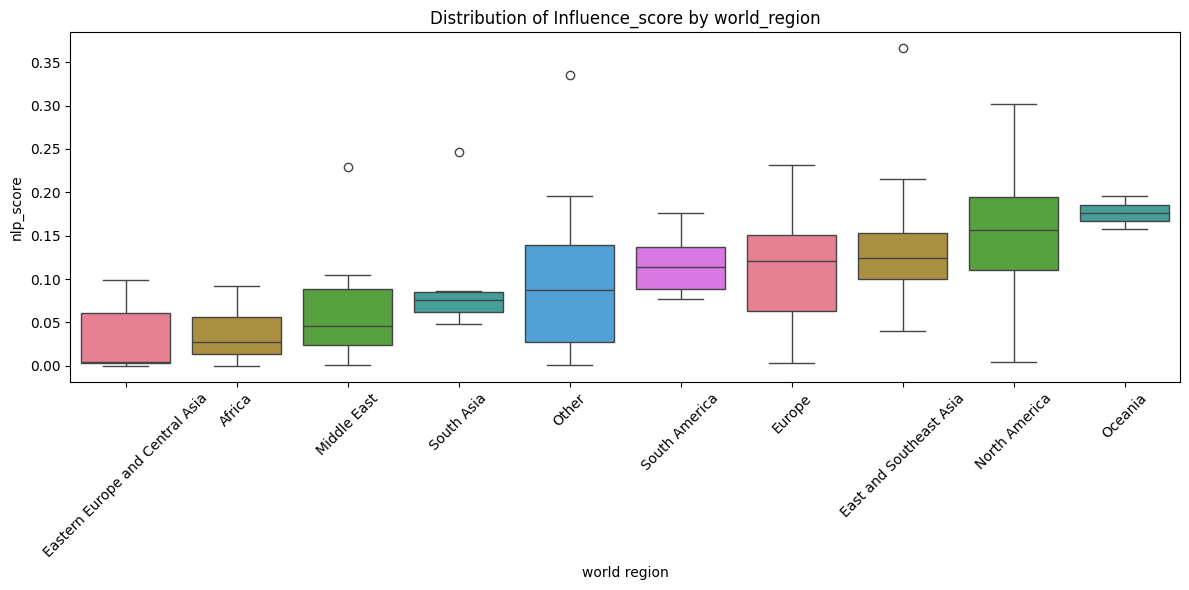

In [20]:
plt.figure(figsize=(12, 6))
# Sort by median ratio
median_order = df_us_influence_final.groupby('World_region')['nlp_score'].median().sort_values().index

# Create the boxplot with the sorted order
sns.boxplot(x='World_region', y='nlp_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))
plt.title('Distribution of Influence_score by world_region')
plt.xlabel('world region')
plt.ylabel('nlp_score')


plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### Il faut standardiser les 2 features pour que la clusterisation ait du sens : excellent c'est très en lien avec le cours

In [6]:
from sklearn.preprocessing import StandardScaler

df_selected = df_us_influence_final[['log_number_of_movies', 'nlp_score']]
# Normalisation des données
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_selected)
df_scaled = pd.DataFrame(df_scaled, columns=df_selected.columns)
df_scaled.head()

,log_number_of_movies,nlp_score
0,2.423053,0.508341
1,1.225773,-0.199466
2,1.137879,0.066659
3,2.819022,-0.196905
4,1.811935,0.868228


In [7]:
df_scaled.describe()

,log_number_of_movies,nlp_score
count,1.430000e+02,1.430000e+02
mean,9.937661e-17,-9.937661e-17
std,1.003515e+00,1.003515e+00
min,-1.414945e+00,-1.290273e+00
25%,-8.165427e-01,-8.650388e-01
50%,-2.181400e-01,-7.755203e-02
75%,7.213128e-01,6.270502e-01
max,2.819022e+00,3.729881e+00


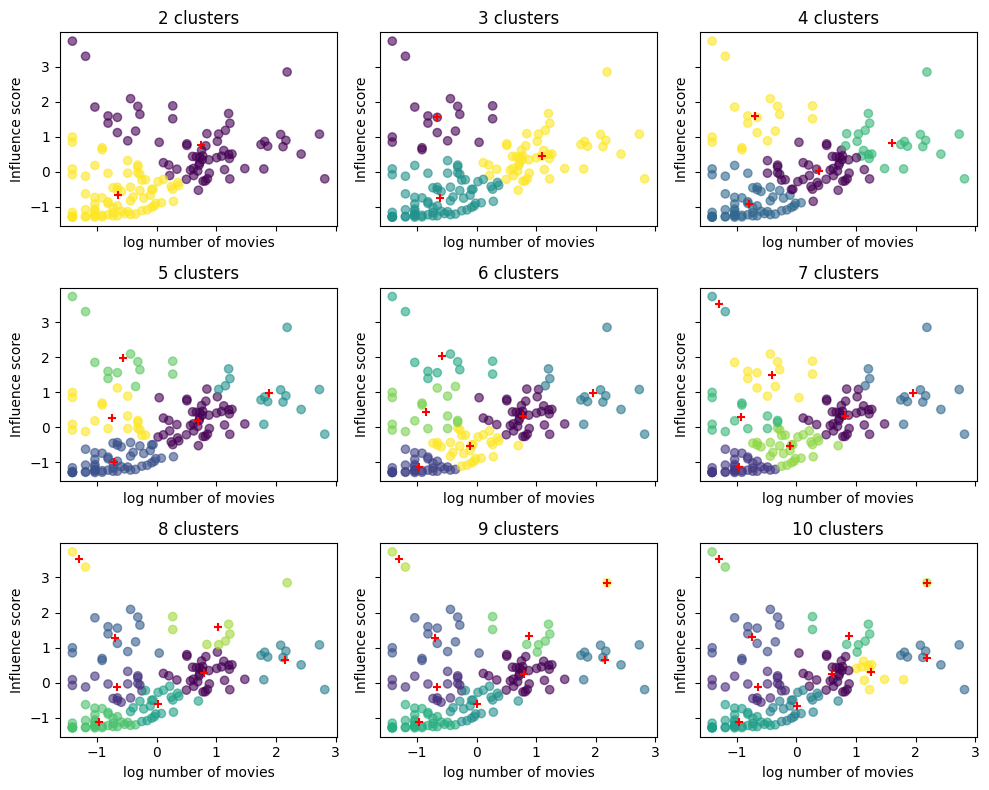

In [47]:
X = df_scaled[['log_number_of_movies', 'nlp_score']].values

MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

# Compute number of row and columns
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    # Plot the data by using the labels as color
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("log number of movies")
    ax.set_ylabel("Influence score")
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

Text(0, 0.5, 'Silhouette score')

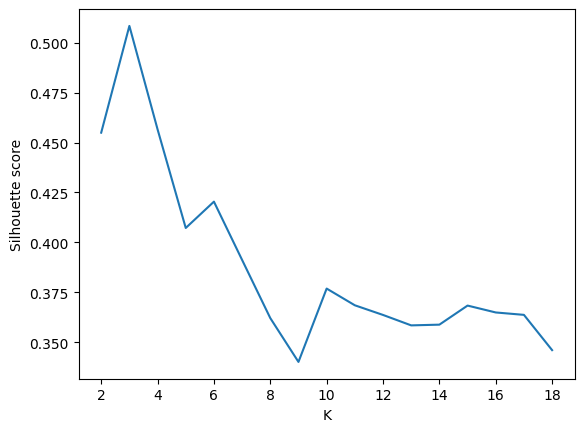

In [38]:
silhouettes = []

# Try multiple k
for k in range(2, 19):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

In [49]:
kmeans_final = KMeans(n_clusters=3, random_state=42).fit(X)
df_us_influence_final['cluster'] = kmeans_final.labels_
df_us_influence_final[df_us_influence_final['cluster']==1].head(30)

,Country,US_Term_Count,Number of movies_x,Influence_score,log_number_of_movies,World_region,Sum_us_score,Number of movies_y,nlp_score,cluster
24,Bulgaria,10,45,0.222222,3.806662,Europe,1.087835,33,0.032965,1
32,Armenia,0,8,0.000000,2.079442,Europe,0.023034,8,0.002879,1
34,Afghanistan,0,8,0.000000,2.079442,Other,0.342701,6,0.057117,1
35,Scotland,1,28,0.035714,3.332205,Other,1.924129,26,0.074005,1
36,Costa Rica,0,5,0.000000,1.609438,Other,0.120516,3,0.040172,1
42,Mongolia,0,6,0.000000,1.791759,Other,0.457002,5,0.091400,1
43,Morocco,7,44,0.159091,3.784190,Africa,2.328459,40,0.058211,1
46,Bosnia and Herzegovina,8,23,0.347826,3.135494,Europe,0.386060,19,0.020319,1
47,Lebanon,0,22,0.000000,3.091042,Middle East,0.962545,21,0.045835,1
50,Democratic Republic of the Congo,0,20,0.000000,2.995732,Africa,0.288708,19,0.015195,1


C:\Users\Oscar\AppData\Local\Temp\ipykernel_32112\1252171230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))
C:\Users\Oscar\AppData\Local\Temp\ipykernel_32112\1252171230.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))


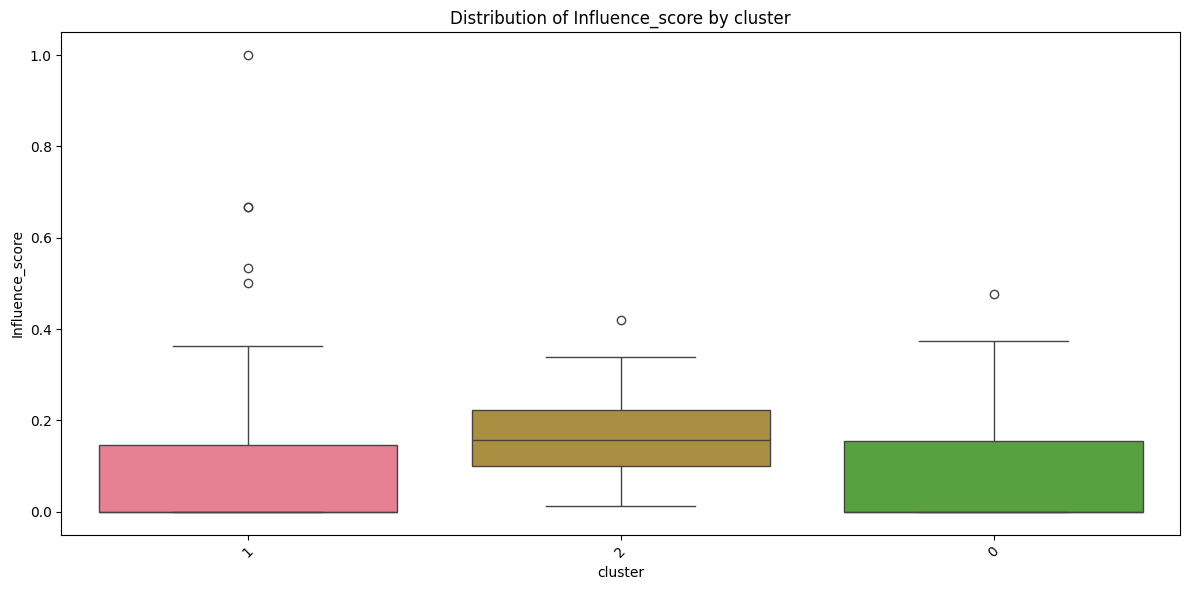

In [40]:
plt.figure(figsize=(12, 6))
# Sort by median ratio
median_order = df_us_influence_final.groupby('cluster')['nlp_score'].median().sort_values().index

# Create the boxplot with the sorted order
sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence_final, order=median_order, palette=sns.color_palette("husl"))
plt.title('Distribution of Influence_score by cluster')
plt.xlabel('cluster')
plt.ylabel('Influence_score')


plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### Ancienne méthode pour le score d'influence

In [3]:
from scriptculture import process_data_us_influence          # Import the function that processes the data for this study

df_us_influence = process_data_us_influence()
df_us_influence.head()

,Country,US_Term_Count,Number of movies,Influence_score,log_number_of_movies,World_region
0,France,531,2297,0.231171,7.739359,Europe
1,Soviet Union,30,255,0.117647,5.541264,Eastern Europe and Central Asia
2,Russia,18,217,0.082949,5.379897,Eastern Europe and Central Asia
3,United States of America,7657,20789,0.368320,9.942179,North America
4,India,262,4752,0.055135,8.466321,South Asia


In [4]:
df_us_influence_nlp = pd.read_csv('scores.csv')
df_us_influence_nlp.head()

,wiki_id,summary,countries,score
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...","['France', 'Soviet Union', 'Russia']",0.000472
1,20663735,Poovalli Induchoodan is sentenced for six yea...,['India'],0.002418
2,20532852,A line of people drool at the window of the s...,[],0.595722
3,18188932,Milan and Goran are two criminals who smuggle ...,['Czech Republic'],0.006639
4,2940516,Bumbling pirate crewman kills his captain aft...,['United Kingdom'],0.296449


For this analysis, we identified a list of typically american words. We then search for this words occurences in the different summaries. We then grouped the results by countries.

The processed dataset that we'll use for this analyse is completed with the features :
 - US_Term_Count : Number of us terms found in the movies from each country
 - Number of movies : number of movies in each country
 - Influence score : ratio of US_Term_Count/Number of movies
 - World_region : Geographical cluster that we identified 


In [13]:
import scriptculture
reload(scriptculture)

<module 'scriptculture' from 'c:\\Users\\Oscar\\Project ADA\\ada-2024-project-teamcsx24\\src/scripts\\scriptculture.py'>

In [7]:
df_us_influence.describe()

,US_Term_Count,Number of movies,Influence_score,log_number_of_movies
count,147.000000,147.000000,147.000000,147.000000
mean,85.088435,321.510204,0.147156,3.290563
std,639.985937,1797.950894,0.230474,1.925694
min,0.000000,2.000000,0.000000,0.693147
25%,0.000000,6.000000,0.000000,1.791759
50%,2.000000,17.000000,0.090909,2.833213
75%,14.000000,101.000000,0.202210,4.615121
max,7657.000000,20789.000000,2.000000,9.942179


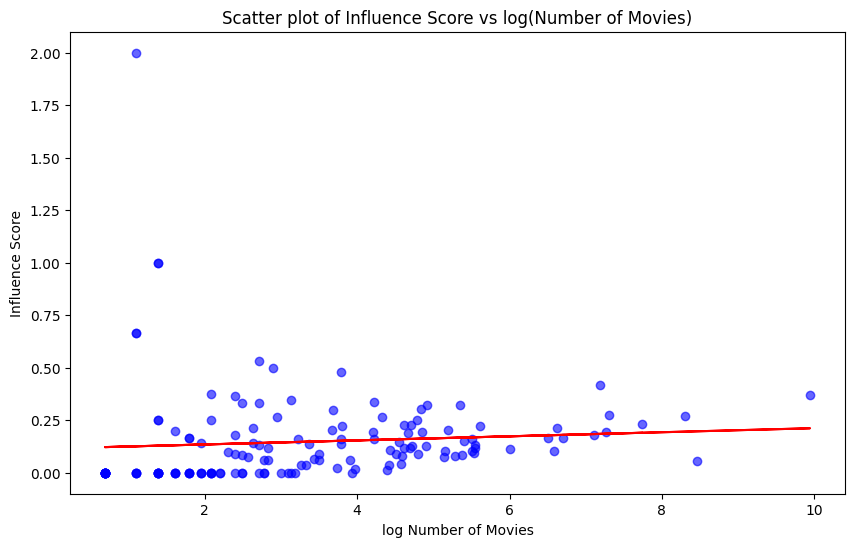

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_us_influence['log_number_of_movies'], 
    df_us_influence['Influence_score'], 
    color='blue', 
    alpha=0.6
)
#add the linear regression line
z = np.polyfit(df_us_influence['log_number_of_movies'], df_us_influence['Influence_score'], 1)
p = np.poly1d(z)
plt.plot(df_us_influence['log_number_of_movies'],p(df_us_influence['log_number_of_movies']),"r-")
plt.title('Scatter plot of Influence Score vs log(Number of Movies)')
plt.xlabel('log Number of Movies')
plt.ylabel('Influence Score')

plt.show()

Too Many small countries with few films, resulting in a high standard deviation (more than 6 times the average term count) and not relevant linear regression, clustering was necessary. The first clustering that seemed the most logical to us was geographical clustering.


C:\Users\Oscar\AppData\Local\Temp\ipykernel_20496\1150267948.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='World_region', y='Influence_score', data=df_us_influence, order=median_order, palette=sns.color_palette("husl"))
C:\Users\Oscar\AppData\Local\Temp\ipykernel_20496\1150267948.py:6: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='World_region', y='Influence_score', data=df_us_influence, order=median_order, palette=sns.color_palette("husl"))


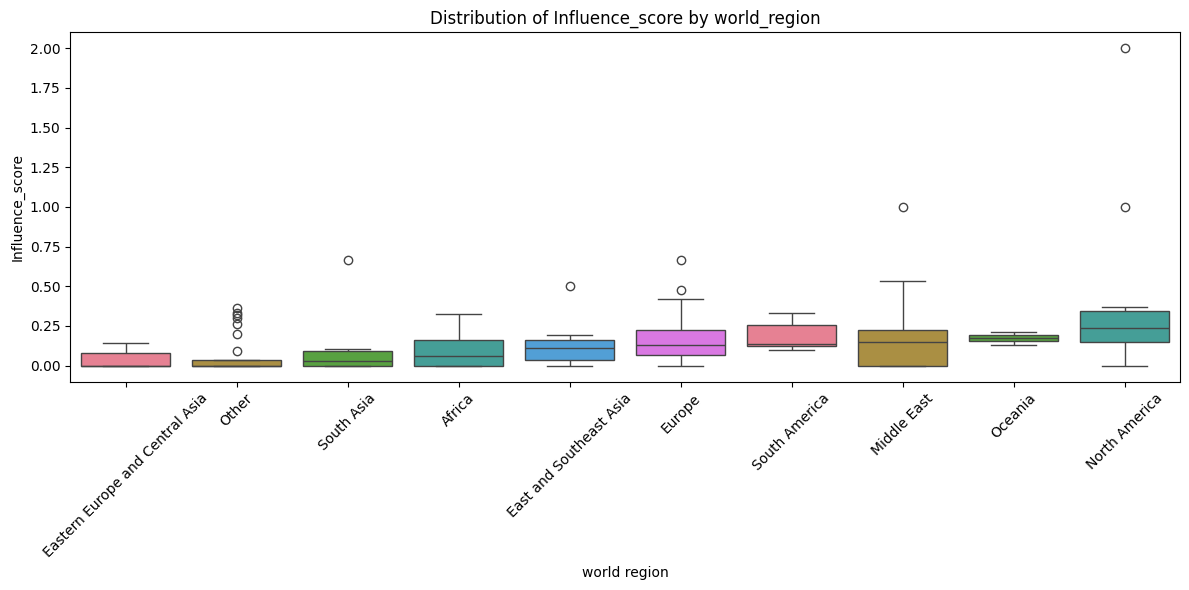

In [9]:
plt.figure(figsize=(12, 6))
# Sort by median ratio
median_order = df_us_influence.groupby('World_region')['Influence_score'].median().sort_values().index

# Create the boxplot with the sorted order
sns.boxplot(x='World_region', y='Influence_score', data=df_us_influence, order=median_order, palette=sns.color_palette("husl"))
plt.title('Distribution of Influence_score by world_region')
plt.xlabel('world region')
plt.ylabel('Influence_score')


plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [10]:
df_us_influence.groupby('World_region')['Influence_score'].describe() #Checking the uniformity of the clusters regarding our feature

,count,mean,std,min,25%,50%,75%,max
World_region,,,,,,,,
Africa,17.0,0.087246,0.094800,0.000000,0.000000,0.060606,0.159091,0.323529
East and Southeast Asia,13.0,0.128948,0.128923,0.000000,0.036145,0.113580,0.162602,0.500000
Eastern Europe and Central Asia,9.0,0.038162,0.059185,0.000000,0.000000,0.000000,0.082949,0.142857
Europe,42.0,0.161546,0.148088,0.000000,0.065202,0.127815,0.224474,0.666667
Middle East,11.0,0.209803,0.309140,0.000000,0.000000,0.147368,0.222656,1.000000
North America,10.0,0.448792,0.611118,0.000000,0.148810,0.236722,0.344772,2.000000
Oceania,2.0,0.173358,0.057340,0.132812,0.153085,0.173358,0.193631,0.213904
Other,29.0,0.065831,0.123967,0.000000,0.000000,0.000000,0.035714,0.363636
South America,8.0,0.182935,0.086291,0.101215,0.124561,0.135632,0.253289,0.333333


The geographical clusters are not very uniform (2 countries for Oceania vs 42 for Europe), and not homogeneous regarding the ratio feature. Indeed, we observe a high standard deviation in each country. This cluster is very interesting in term of interpretability but we should consider another clustering method to solve these issues.

Areas for improvement for this study:

 - The identification of US-related terms could be enhanced, either manually or through more advanced techniques. We have begun exploring Natural Language Processing (NLP) methods that could assist with this task and even enable us to assess the influence of each country on others based on the themes present in the film summaries. We started to look at Transformer from HuggingFace and Spacy that could be used for this task

 - The current geographical clustering may not be optimal due to its lack of uniformity and the high variance in the ratios. To address this, we plan to experiment with clustering algorithms like KNN or centroids (as we can define an euclidian distance with the ratio) to achieve more homogeneous,uniform and interpretable clusters.




### Clusterisation : k-means choosen with silhouette score

In [21]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

We try to determine the best K for the K-means clusterisation, let's see

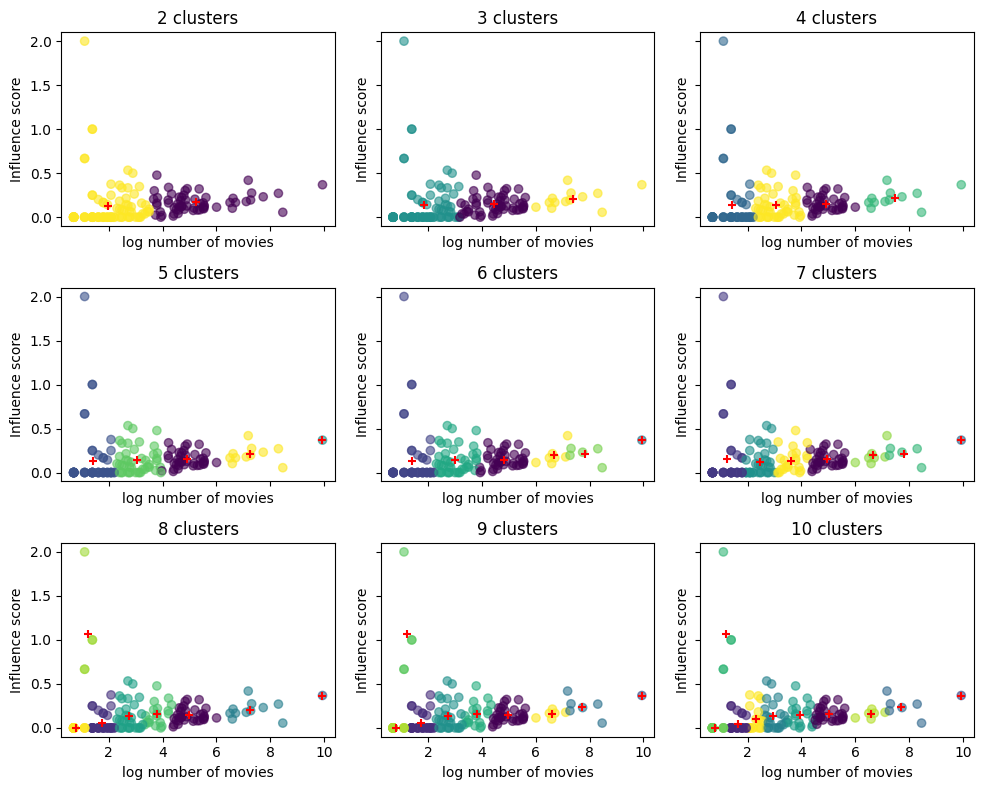

In [25]:
X = df_us_influence[['log_number_of_movies', 'Influence_score']].values

MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

# Compute number of row and columns
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    # Plot the data by using the labels as color
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("log number of movies")
    ax.set_ylabel("Influence score")
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

Let's test the silhouette score

Text(0, 0.5, 'Silhouette score')

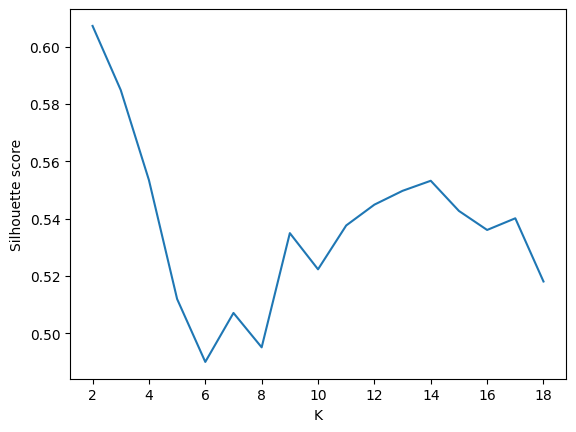

In [26]:
silhouettes = []

# Try multiple k
for k in range(2, 19):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

In [29]:
silhouettes.head(15).sort_values(by='score', ascending=False)


,k,score
0,2,0.607210
1,3,0.584839
2,4,0.553450
12,14,0.553228
11,13,0.549723
10,12,0.544900
13,15,0.542708
9,11,0.537647
14,16,0.536075
7,9,0.534970


Let's conserve the 3 clusters given by the best score of K-means 

In [35]:
kmeans_final = KMeans(n_clusters=3, random_state=42).fit(X)
df_us_influence['cluster'] = kmeans_final.labels_
df_us_influence[df_us_influence['cluster']==2].head(13)

,Country,US_Term_Count,Number of movies,Influence_score,log_number_of_movies,World_region,cluster
0,France,531,2297,0.231171,7.739359,Europe,2
3,United States of America,7657,20789,0.368320,9.942179,North America,2
4,India,262,4752,0.055135,8.466321,South Asia,2
5,Australia,160,748,0.213904,6.617403,Oceania,2
7,Canada,409,1492,0.274129,7.307873,North America,2
8,Germany,551,1315,0.419011,7.181592,Europe,2
10,United Kingdom,1093,4037,0.270746,8.303257,Europe,2
12,Spain,111,667,0.166417,6.502790,Europe,2
13,Italy,217,1222,0.177578,7.108244,Europe,2
15,China,46,405,0.113580,6.003887,East and Southeast Asia,2


C:\Users\Oscar\AppData\Local\Temp\ipykernel_20496\3552391364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence, order=median_order, palette=sns.color_palette("husl"))
C:\Users\Oscar\AppData\Local\Temp\ipykernel_20496\3552391364.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence, order=median_order, palette=sns.color_palette("husl"))


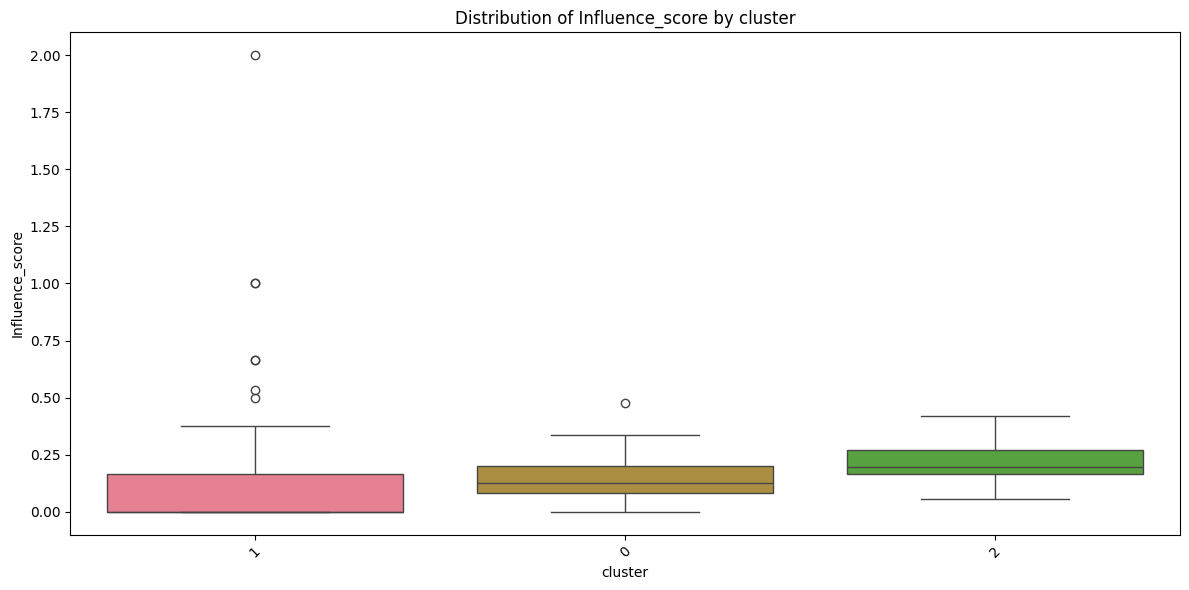

In [32]:
plt.figure(figsize=(12, 6))
# Sort by median ratio
median_order = df_us_influence.groupby('cluster')['Influence_score'].median().sort_values().index

# Create the boxplot with the sorted order
sns.boxplot(x='cluster', y='Influence_score', data=df_us_influence, order=median_order, palette=sns.color_palette("husl"))
plt.title('Distribution of Influence_score by cluster')
plt.xlabel('cluster')
plt.ylabel('Influence_score')


plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [33]:
df_us_influence.groupby('cluster')['Influence_score'].describe() #Checking the uniformity of the clusters regarding our feature

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,54.0,0.144550,0.098856,0.000000,0.080808,0.125933,0.202143,0.477273
1,80.0,0.138395,0.298718,0.000000,0.000000,0.000000,0.166667,2.000000
2,13.0,0.211892,0.102864,0.055135,0.166417,0.195682,0.270746,0.419011


### NLP methods utilization

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

#Summary example
resume = "The character travels through the streets of Paris, facing challenges that test his courage. He then fly straight to Spain"

# We apply the NLP model to the summary
doc = nlp(resume)

# Extract the geographical entities from the summary
pays_detectes = [ent.text for ent in doc.ents if ent.label_ == "GPE"]  # GPE = Geopolitical Entity

print(pays_detectes)

['Paris', 'Spain']


We will expand our analysis by exploring the influence of specific cities or countries on movie themes. One approach would be to create an additional influence feature based on the frequency of mentions of cities or countries in the movie summaries. This would allow us to quantify the impact of these locations on the themes, potentially revealing patterns of cultural influence or regional trends within the film industry.

In [4]:
from transformers import pipeline

# Here we use the zero-shot-classification pipeline
nlp = pipeline("zero-shot-classification")

# movie summary example
resume = "Five men attend the same gym in Berlin. None of them seem to have anything in common, but all five have not enough confidence to meet or develop relationships with the opposite sex, and what it really means to be a man or what women expect of them. Günther Stobanski, portrayed by Christian Ulmen, fails with Internet dating, music producer Jerome Ades, portrayed by Til Schweiger, passes from a sentimental break-up story to another. Roland Feldberg, a train driver portrayed by Wotan Wilke Möhring, snubs his wife Susanne Feldberg portrayed by Nadja Uhl. The girlfriend of Philip Henrion, portrayed by Maxim Mehmet, becomes pregnant at a young age. Niklas Michalke, a solicitor portrayed by Florian David Fitz, is terrified by his impending marriage, while Bruce Berger, a singer portrayed by Justus von Dohnányi, tries to pursue his singing career."

# Here we define the label (countries in our case)
labels = ["United States", "France", "India", "Germany"]

result = nlp(resume, candidate_labels=labels)

# The result is a dataframe with the labels and their respective scores
df_result = pd.DataFrame(list(zip(result['labels'], result['scores'])), columns=['Label', 'Score'])

df_result.head()

c:\Users\Oscar\anaconda3\envs\projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


,Label,Score
0,Germany,0.887495
1,India,0.043266
2,France,0.041677
3,United States,0.027562


The function classifies the movie summary by calculating the likelihood that represent the probability that the events in the movie take place in a specific country, using a pre-trained zero-shot model. This means the model doesn't need to be retrained on the specific countries, as it has already learned general language patterns and can apply them to this kinf of task.

This second approach can be very useful for enriching our analysis about cultural influence, especially by applying a threshold to filter the results, which adds depth to the explanations. We will also evaluate the model's performance by testing precision, recall, and accuracy across several labeled summaries. Additionally, experimenting with different thresholds when displaying the results could provide further insights. The F-score could also be a valuable metric to assess the balance between precision and recall.

### IV.4 Character Study for Cultural Influence Analysis

In [16]:
from scriptculture import process_data_character          # Import the function that processes the data for this study

df_character_influence = process_data_character()
df_character_influence.head()

,Character,character_actor_freebase_id,actor_name,first_movie_name,first_apperance_date,origin_country,all_countries,number_countries
0,'Baby' Louise,/m/0c0lv89,Diane Pace,Gypsy,1962-01-01,[United States of America],[United States of America],1
1,ACP Jai Dixit,/m/0220_c2,Abhishek Bachchan,Dhoom,2004-08-27,[India],[India],1
2,Abigail Chase,/m/0k14v6,Diane Kruger,National Treasure,2004-11-08,[United States of America],[United States of America],1
3,Abraham Lincoln,/m/0k89pf,Henry Fonda,Young Mr. Lincoln,1939-01-01,[United States of America],[United States of America],1
4,Abraham Van Helsing,/m/0jxjsg,Edward Van Sloan,Dracula,1931-02-12,[United States of America],"[United Kingdom, United States of America, Spa...",4


In [9]:
df_character_influence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Character                    970 non-null    object
 1   character_actor_freebase_id  970 non-null    object
 2   actor_name                   970 non-null    object
 3   first_movie_name             970 non-null    object
 4   first_apperance_date         969 non-null    object
 5   origin_country               970 non-null    object
 6   all_countries                970 non-null    object
 7   number_countries             970 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 60.8+ KB


For this analysis, we grouped the characters that appeared in different countries (from the character_cluster database). 

The processed dataset that we'll use for this analyse is completed with the features :
 - first_movie_name : The first movie in which the character appeared
 - first_apperance_date : The date of release of the first movie 
 - origin_country : The country of the first movie
 - all_countries : the countries of origin of all the movies in which the character has appeared 
 - number_countries : count of all_countries


In [12]:
df_character_influence.describe()

,number_countries
count,970.000000
mean,1.797938
std,1.161116
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


970 characters appear in multiple films; on average, they appear in 1.8 different countries. They feature in up to 8 different films. Let's look at the distribution of the number of countries

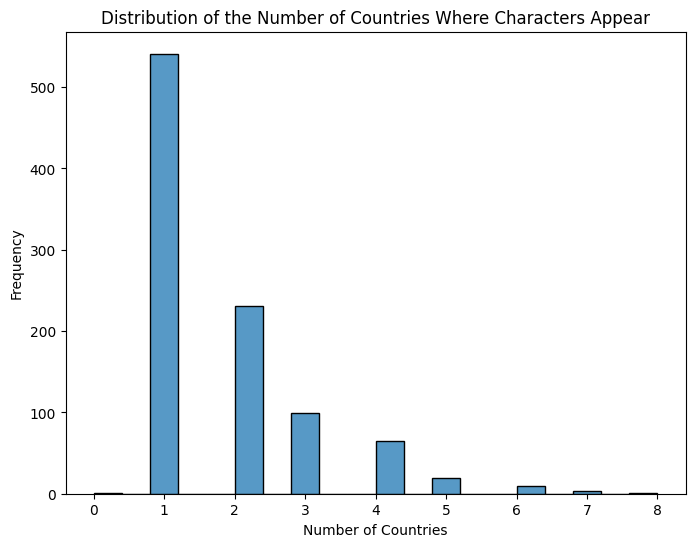

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df_character_influence['number_countries'], kde=False, bins=20)

plt.title('Distribution of the Number of Countries Where Characters Appear')
plt.xlabel('Number of Countries')
plt.ylabel('Frequency')

plt.show()

In [14]:
print(df_character_influence[df_character_influence['number_countries'] > 1].count()) #Number of characters that appear in more than one country
print("number of influence point to be given :",df_character_influence['number_countries'].sum()-970) #Number of influence point to be given

Character                      428
character_actor_freebase_id    428
actor_name                     428
first_movie_name               428
first_apperance_date           428
origin_country                 428
all_countries                  428
number_countries               428
dtype: int64
number of influence point to be given : 774


Of the 970 characters, 428 appear in movies produced across different countries, which is not a large sample. We will keep this in mind as we test the significance of our study.

For each character appearing in a movie produced by a different country, we will assign 1 influence point to the character's origin country. This results in a total of 774 points being assigned.

A major concern that remains is whether the method of taking the first movie appearance as the origin country of a character is reliable.

Let's test this with the character that appears in movies produced in the most countries.

In [15]:
#find the character that appear in 8 countries and show all the origin countries one by one

df_character_influence[df_character_influence['number_countries'] == 8].head()

,Character,character_actor_freebase_id,actor_name,first_movie_name,first_apperance_date,origin_country,all_countries,number_countries
120,Cardinal Richelieu,/m/02vbtwv,Charlton Heston,The Three Musketeers,1973-01-01,"[United States of America, Spain, United Kingdom]","[Panama, Germany, United Kingdom, Austria, Uni...",8


The character appearing in productions from the most different countries is Cardinal Richelieu (French origin). However, with our initial method, the influence points would not have been distributed to France but to UK, US and Spain.

This analysis drives us to explore other methods for identifying character origins. One possibility is to leverage Natural Language Processing (NLP) models, such as spaCy to analyze movie summaries geographical terms and better determine the character's origin. 

Additionally, using embedding models like Hugging Face transformers could help identify implicit relationships within the movie summaries and find where the history of the movie take place and deduct the characters origin from this.

In [ ]:
from transformers import pipeline

# Here we use the zero-shot-classification pipeline
nlp = pipeline("zero-shot-classification")

# movie summary example
character = "Maria Elena"

# Here we define the label (countries in our case)
labels = ["United States", "France", "India", "Germany","United Kingdom","Italy","Spain","China","Scotland"]

result = nlp(character, candidate_labels=labels)

# The result is a dataframe with the labels and their respective scores
df_result = pd.DataFrame(list(zip(result['labels'], result['scores'])), columns=['Label', 'Score'])

df_result.head()

c:\Users\Oscar\anaconda3\envs\projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


,Label,Score
0,Spain,0.390203
1,Italy,0.147756
2,United Kingdom,0.085401
3,United States,0.078174
4,India,0.068733


On peut carrément trouver l'origine du personnage avec ça. ça marche vraiment bien !

In [15]:
from countries import europe, north_america, south_america, africa, east_asia, south_asia, middle_east, eastern_europe_central_asia, oceania, caribbean



from transformers import pipeline

# Here we use the zero-shot-classification pipeline
nlp = pipeline("zero-shot-classification")

# movie summary example
character = "Maria Elena"

# Here we define the label (countries in our case)
labels = (
    list(europe) +
    list(north_america) +
    list(south_america) +
    list(africa) +
    list(east_asia) +
    list(south_asia) +
    list(middle_east) +
    list(eastern_europe_central_asia) +
    list(oceania) +
    list(caribbean)
)


result = nlp(character, candidate_labels=labels)

# The result is a dataframe with the labels and their respective scores
df_result = pd.DataFrame(list(zip(result['labels'], result['scores'])), columns=['Label', 'Score'])

df_result.head(10)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


,Label,Score
0,Greece,0.037092
1,Spain,0.029252
2,Russia,0.028600
3,Moldova,0.016600
4,Moldova,0.016600
5,Soviet Union,0.015824
6,Mexico,0.015406
7,Soviet occupation zone,0.014918
8,Romania,0.014903
9,Ukrainian SSR,0.014736


In [20]:
df_character_nlp = pd.read_csv('character_countries.csv')
df_character_influence_nlp = pd.merge(df_character_influence, df_character_nlp, on='Character', how='inner')

In [70]:
df_character_influence_nlp.sample(10)

,Character,character_actor_freebase_id,actor_name,first_movie_name,first_apperance_date,origin_country,all_countries,number_countries,Best_Country,Best_Score
309,Gabriel Van Helsing,/m/0k7p7w,Hugh Jackman,Van Helsing,2004-05-07,"[United States of America, Czech Republic]","[United States of America, Czech Republic]",2,United States of America,0.523374
902,Tom Ripley,/m/0k1z7v,Alain Delon,Plein Soleil,1960-03-10,"[France, Italy]","[United States of America, Italy, France]",3,United States of America,0.546179
831,Silent Bob,/m/09vvrgm,Kevin Smith,Chasing Amy,1997-01-23,[United States of America],[United States of America],1,United States of America,0.001977
66,Barnyard Dawg,/m/0hyp1g3,Mel Blanc,Crowing Pains,1947-07-12,[United States of America],[United States of America],1,United States of America,0.000662
496,King Harold,/m/04_bz4y,John Cleese,Shrek 2,2004-05-15,[United States of America],[United States of America],1,United States of America,0.000228
475,Kamal Khan,/m/04r9c2w,Louis Jourdan,Octopussy,1983-06-06,"[United States of America, United Kingdom]","[United States of America, India, United Kingdom]",3,India,0.427283
670,Norman Pitkin,/m/0c5m6h2,Norman Wisdom,The Square Peg,1959-01-04,[United Kingdom],[United Kingdom],1,United Kingdom,0.080536
875,The Emperor of China,/m/05yvrzt,Pat Morita,Mulan,1998-06-05,[United States of America],[United States of America],1,United States of America,0.000051
876,The Father,/m/0jb9n97,Kamal al-Shennawi,Nahwa al-Majd,1949-01-01,[Egypt],"[United States of America, Egypt, Luxembourg, ...",4,United Kingdom,0.322722
621,Mohandas Karamchand Gandhi,/m/0jzcxc,Naseeruddin Shah,Hey Ram,2000-02-18,[India],[India],1,India,0.671008


In [49]:
df_character_influence_nlp[df_character_influence_nlp['Best_Score'] < 0.01].info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 968
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Character                    217 non-null    object 
 1   character_actor_freebase_id  217 non-null    object 
 2   actor_name                   217 non-null    object 
 3   first_movie_name             217 non-null    object 
 4   first_apperance_date         217 non-null    object 
 5   origin_country               217 non-null    object 
 6   all_countries                217 non-null    object 
 7   number_countries             217 non-null    int64  
 8   Best_Country                 217 non-null    object 
 9   Best_Score                   217 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 18.6+ KB


In [61]:
df_character_influence_nlp[df_character_influence_nlp['number_countries'] > 1]['number_countries'].sum()

np.int64(1203)

In [ ]:
df_character_influence_nlp[df_character_influence_nlp['number_countries'] > 1].groupby('Best_Country')['number_countries'].sum().sort_values(ascending=False)

Best_Country
United States of America    477
United Kingdom              440
Canada                       55
France                       48
Germany                      41
India                        20
Czech Republic               15
Japan                        14
Sweden                       12
China                        12
Hong Kong                    11
Romania                       9
Brazil                        8
Mexico                        8
Italy                         6
Poland                        6
Soviet Union                  4
Ireland                       4
Hungary                       3
West Germany                  3
Netherlands                   3
New Zealand                   2
Spain                         2
Name: number_countries, dtype: int64

In [71]:
df_character_influence_nlp[df_character_influence_nlp['number_countries'] == 8].head()

,Character,character_actor_freebase_id,actor_name,first_movie_name,first_apperance_date,origin_country,all_countries,number_countries,Best_Country,Best_Score
120,Cardinal Richelieu,/m/02vbtwv,Charlton Heston,The Three Musketeers,1973-01-01,"[United States of America, Spain, United Kingdom]","[Spain, France, United States of America, Germ...",8,France,0.689668


Problème résolu (partiellement en réalité mais on a là une bonne approximation)